<a href="https://colab.research.google.com/github/IshaSinghVatsa/SpatioTempDA/blob/main/STDA_lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')


In [ ]:
pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.2 MB/s 
     |████████████████████████████████| 6.3 MB 46.3 MB/s 
     |████████████████████████████████| 16.7 MB 1.3 MB/s 


In [ ]:
import geopandas as gpd

In [ ]:
df = pd.read_csv("/content/DATE_SORTED.csv")

In [ ]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight
0,37.23470,36.24439,337.80,0.55,0.68,2021-07-30,934,nominal,304.39,6.15,Daytime
1,36.80326,39.81656,367.00,0.36,0.58,2021-07-30,934,high,310.83,11.46,Daytime
2,37.58023,35.61065,333.64,0.58,0.70,2021-07-30,934,nominal,304.43,4.82,Daytime
3,37.53907,39.13546,345.75,0.38,0.59,2021-07-30,934,nominal,312.44,12.77,Daytime
4,38.05180,40.24236,367.00,0.32,0.55,2021-07-30,934,high,314.63,8.44,Daytime


In [ ]:
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf

,latitude,longitude,brightness,scan,track,acq_date,acq_time,confidence,bright_t31,frp,daynight,geometry
0,37.23470,36.24439,337.80,0.55,0.68,2021-07-30,934,nominal,304.39,6.15,Daytime,POINT (36.24439 37.23470)
1,36.80326,39.81656,367.00,0.36,0.58,2021-07-30,934,high,310.83,11.46,Daytime,POINT (39.81656 36.80326)
2,37.58023,35.61065,333.64,0.58,0.70,2021-07-30,934,nominal,304.43,4.82,Daytime,POINT (35.61065 37.58023)
3,37.53907,39.13546,345.75,0.38,0.59,2021-07-30,934,nominal,312.44,12.77,Daytime,POINT (39.13546 37.53907)
4,38.05180,40.24236,367.00,0.32,0.55,2021-07-30,934,high,314.63,8.44,Daytime,POINT (40.24236 38.05180)
...,...,...,...,...,...,...,...,...,...,...,...,...
4570,40.44351,27.14120,306.60,0.41,0.61,2021-07-15,2312,nominal,295.70,2.00,Nighttime,POINT (27.14120 40.44351)
4571,36.98703,35.75649,335.90,0.52,0.42,2021-07-15,1054,low,308.80,13.00,Daytime,POINT (35.75649 36.98703)
4572,36.23397,33.23435,335.70,0.53,0.42,2021-07-15,2312,nominal,301.70,16.10,Nighttime,POINT (33.23435 36.23397)
4573,37.01692,36.09351,307.00,0.42,0.38,2021-07-15,2312,nominal,296.20,1.40,Nighttime,POINT (36.09351 37.01692)


In [ ]:
pip install traja

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 91 kB 4.3 MB/s 


In [ ]:
import traja
traja.__version__

'22.0.0'

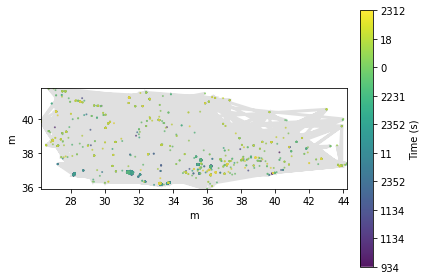

In [ ]:
trj = traja.TrajaDataFrame(df.rename(columns={"longitude": "x", "latitude": "y", "t": "acq_time"}))
trj.traja.plot()

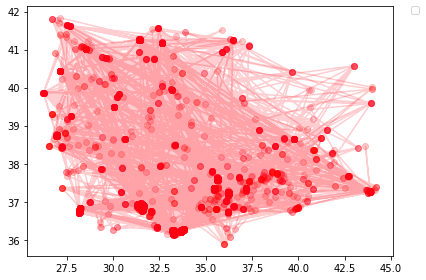

In [ ]:
trjs = traja.TrajaCollection(df.rename(columns={"longitude": "x", "latitude": "y", "acq_time": "time"}), id_col="daynight")
lines = trjs.plot()

In [ ]:
pip install scikit-mobility

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 154 kB 4.9 MB/s 
     |████████████████████████████████| 994 kB 54.8 MB/s 
     |████████████████████████████████| 62 kB 1.7 MB/s 
     |████████████████████████████████| 1.1 MB 48.4 MB/s 
     |████████████████████████████████| 3.1 MB 49.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: geopandas
    Found existing installation: geopandas 0.10.2
    Uninstalling geopandas-0.10.2:
      Successfully uninstalled geopandas-0.10.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transbigdata 0.4.14 requires geopandas>=0.10.2, but you have geopandas 0.9.0 which is incompatible.


In [ ]:
import skmob

In [ ]:
tdf = skmob.TrajDataFrame(df, 'longitude','latitude','acq_time' )

In [ ]:
tdf.head()

,lng,lat,brightness,scan,track,acq_date,datetime,confidence,bright_t31,frp,daynight,geometry
0,37.23470,36.24439,337.80,0.55,0.68,2021-07-30,1970-01-01 00:00:00.000000934,nominal,304.39,6.15,Daytime,POINT (36.24439 37.23470)
1,36.80326,39.81656,367.00,0.36,0.58,2021-07-30,1970-01-01 00:00:00.000000934,high,310.83,11.46,Daytime,POINT (39.81656 36.80326)
2,37.58023,35.61065,333.64,0.58,0.70,2021-07-30,1970-01-01 00:00:00.000000934,nominal,304.43,4.82,Daytime,POINT (35.61065 37.58023)
3,37.53907,39.13546,345.75,0.38,0.59,2021-07-30,1970-01-01 00:00:00.000000934,nominal,312.44,12.77,Daytime,POINT (39.13546 37.53907)
4,38.05180,40.24236,367.00,0.32,0.55,2021-07-30,1970-01-01 00:00:00.000000934,high,314.63,8.44,Daytime,POINT (40.24236 38.05180)


In [ ]:
tdf.plot_trajectory(zoom=10, weight=3, opacity=0.9, tiles='Stamen Toner')